<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


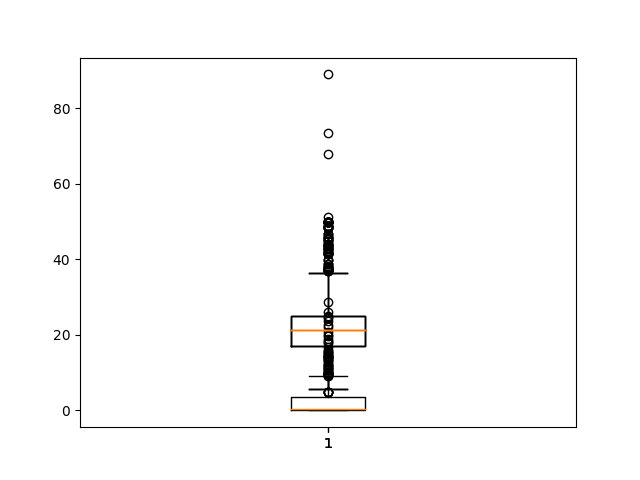

In [15]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.show()

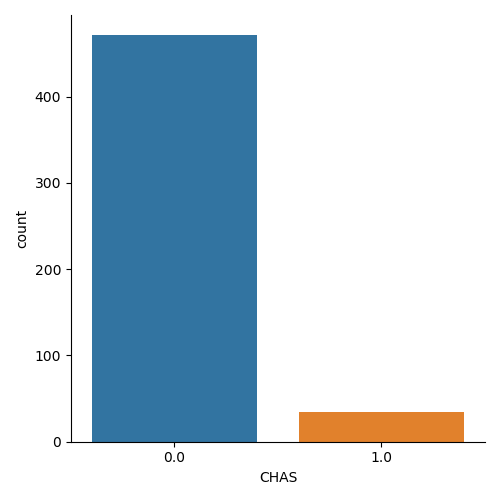

In [60]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.show()

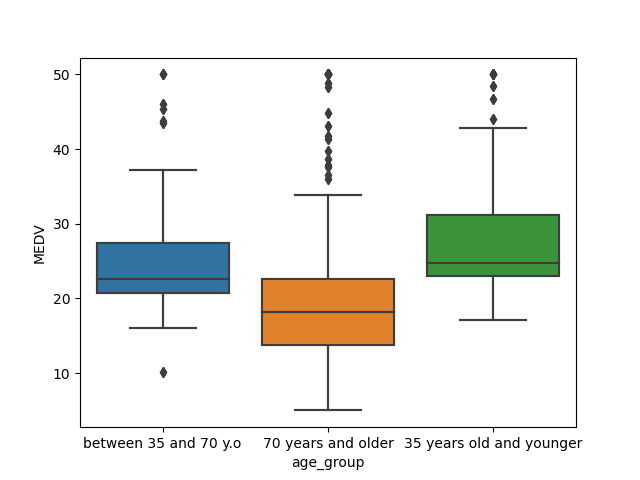

In [58]:
boston_df.loc[boston_df['AGE']<=35, 'age_group'] = '35 years old and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group'] = 'between 35 and 70 y.o'
boston_df.loc[boston_df['AGE']>70,'age_group']='70 years and older'

boston_df['age_group']
sns.boxplot(x=boston_df['age_group'], y=boston_df['MEDV'], data=boston_df)
pyplot.show()

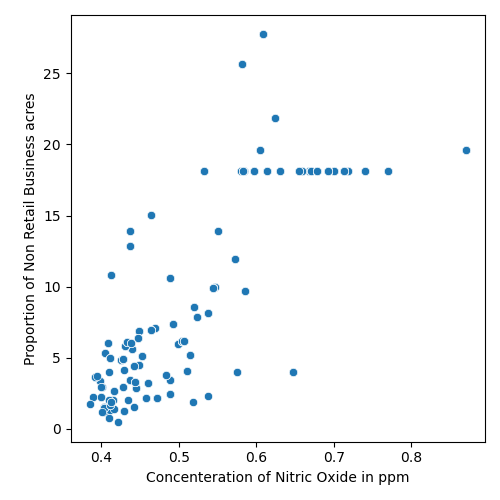

In [62]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.xlabel("Concenteration of Nitric Oxide in ppm")
pyplot.ylabel("Proportion of Non Retail Business acres")
pyplot.show()


### It is shown in the picture that looks like it give positive linear relationship where the increase of proportion of Non retail business acres will increase the concentration of Nitric Oxide ppm ###

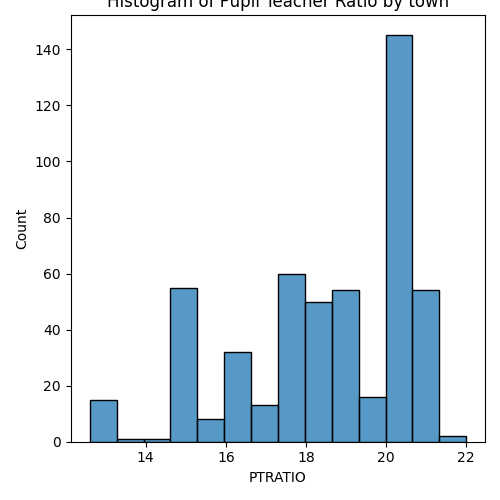

In [66]:
sns.histplot(x="PTRATIO", data=boston_df)
pyplot.title("Histogram of Pupil Teacher Ratio by town")
pyplot.show()

In [71]:
##
# H_0 = Mean MEDV if Charles river is 1 = Mean MEDV if charles river is 0
# H_a = Mean MEDV if Charles river is 1 =/ Mean MEDV if charles river is 0

(z,pvalue) = scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])
print("Z score is",z)
print("P value is", pvalue)
print("since p value is below than 0.05 , then the conclusion is there is statistical difference of Median Value of the houses that located near charles river and not located there")

Z score is 3.996437466090509
P value is 7.390623170519905e-05
since p value is below than 0.05 , then the conclusion is there is statistical difference of Median Value of the houses that located near charles river and not located there


In [76]:
#H_0 : Mean of each age group are the same
#H_a : there is significant difference in mean between each age group

(fstats,pvalanova)=scipy.stats.f_oneway(boston_df['age_group']=='35 years old and younger', boston_df['age_group']=='between 35 and 70 y.o',
                     boston_df['age_group']=='70 years and older')
print("F score is", fstats)
print("Pvalue is", pvalanova)
print("because P value is less than 0.05, there is difference between age group")

F score is 110.2613723305728
Pvalue is 1.9683840083822383e-45
because P value is less than 0.05, there is difference between age group


In [80]:
#H_0 : there is no relationship between Nitric Oxide and Proportion of Non Retail Business per acress in town
#H_a : there is relationship between Nitric Oxide and Proportion of Non Retail Business per accress in town

(Fpearson_score, Ppearson) = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print("F score is", Fpearson_score)
print("P value score is", Ppearson)
print("since P value is less than 0.05 there is an evidence that Nitric Oxide and the Proportion of Non Retail Business per acress in town are have a relation")

F score is 0.7636514469209189
P value score is 7.913361061211254e-98
since P value is less than 0.05 there is an evidence that Nitric Oxide and the Proportion of Non Retail Business per acress in town are have a relation


In [85]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predict = model.predict(X)

model.summary()

## the impact of addition weighted distance to five boston employement center is adding 1.0916 score on median value of owner occupied homes")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        22:30:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""